## Demonstration of peak detection in autocorrelation map using local maxima
### working example

load spatial autocorrelation map: spatial_auto.pickle
shape:  (93, 93)


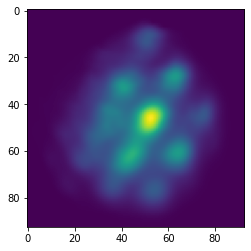

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

fn = "spatial_auto.pickle"
print("load spatial autocorrelation map:",fn)

with open(fn, 'rb') as f:
    auto_map = pickle.load(f)

print("shape: ",auto_map.shape)

plt.imshow(auto_map)
plt.show()


In [2]:
# Idea: detect local maxima in autocorr image (with a maximum filter applied before) 
# reference: https://stackoverflow.com/questions/9111711/get-coordinates-of-local-maxima-in-2d-array-above-certain-value
# nota bene: this uses maximum filter, a non-linear filter that cannot be represented with a Kernel (image processing) convolution matrix,
## see: https://towardsdatascience.com/image-processing-part-2-1fb84931364a

In [3]:
import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters

def get_local_max(data, threshold, neighborhood_size = 5):

    data_max = filters.maximum_filter(data, neighborhood_size)
    maxima = (data == data_max)
    data_min = filters.minimum_filter(data, neighborhood_size)
    diff = ((data_max - data_min) > threshold)
    maxima[diff == 0] = 0

    labeled, num_objects = ndimage.label(maxima)
    slices = ndimage.find_objects(labeled)
    x, y = [], []
    for dy,dx in slices:
        x_center = (dx.start + dx.stop - 1)/2
        x.append(round(x_center))
        y_center = (dy.start + dy.stop - 1)/2    
        y.append(round(y_center))
        
    return(x,y)
    #return( [ (x_,y_) for x_,y_ in zip(x,y) ] )


found 9 peaks:
[(51, 13), (63, 28), (41, 33), (35, 43), (75, 45), (52, 46), (64, 61), (44, 62), (54, 76)]


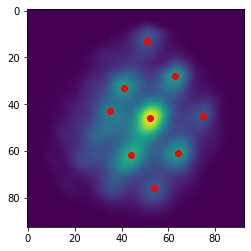

In [4]:
# example

x,y = get_local_max(auto_map, .03, 5)

print("found",len(x),"peaks:")
print([ (x_,y_) for x_,y_ in zip(x,y) ])

plt.imshow(auto_map)
plt.autoscale(False)
plt.plot(x,y, 'ro')
plt.show()

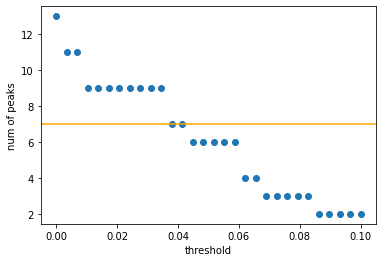

In [5]:
# examine what threshold is suitable to detect 7 points (hexagon + center)

thresholds = np.linspace(0,0.1,30)
neighborhood_size = 4
numsofpeaks = [ len(get_local_max(auto_map, threshold, neighborhood_size)[0]) for threshold in thresholds ]

plt.xlabel("threshold")
plt.ylabel("num of peaks")
plt.axhline(y=7 , color="orange")
plt.scatter(thresholds,numsofpeaks)
plt.show()

suitable thresholds: [0.03793103 0.04137931] . Use:  0.03965517241379311


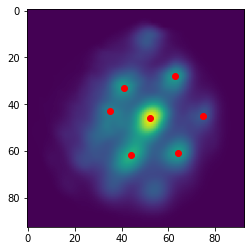

In [6]:
# finally, get the good threshold, and detect the 7 most dominant grid parts of skeletön

thresholds_good = thresholds[np.where(np.array(numsofpeaks) == 7)[0]]
threshold_goodmean = np.mean(thresholds_good)
print("suitable thresholds:", thresholds_good, ". Use: ",threshold_goodmean)


x,y = get_local_max(auto_map, threshold_goodmean, neighborhood_size)
plt.imshow(auto_map)
plt.autoscale(False)
plt.plot(x,y, 'ro')
plt.show()